In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [28]:
!mkdir drive
!google-drive-ocamlfuse drive

import os 
os.chdir("/content/drive/Colab_Notebooks/11december/letter")
!pwd

mkdir: cannot create directory ‘drive’: File exists
/content/drive/Colab_Notebooks/11december/letter


In [35]:
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

In [36]:
def getImages(path):
#this method serves getting all images in specific folder when it is called.
  temp_arr = []
  name_arr= []
  path = path
  valid_images = [".jpg",".gif",".jpeg",".png"]
  for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
      continue

    temp_arr.append(cv.imread(os.path.join(path,f)))    #fitting all images into array

    temp_text = str(os.path.join(path,f))
    img_name = temp_text.split('/')
    img_name = img_name[(len(temp_text.split('/'))-1)] 


    img_name_wo = img_name.split('.')
    img_name_wo = img_name[0]  #fitting all names into array

    name_arr.append(img_name_wo)

  return temp_arr,name_arr    #image pixels and names !!!


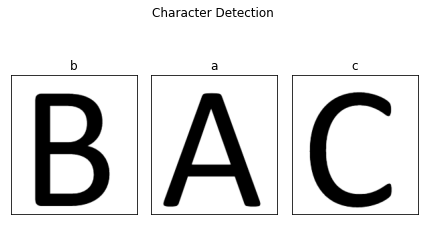

In [52]:
path_test ='/content/drive/Colab_Notebooks/11december/letter/pic/testImages/'
path_chr = '/content/drive/Colab_Notebooks/11december/letter/pic/letterImages/'

test_arr , test_names = getImages(path_test)
chr_arr, chr_names = getImages(path_chr)

test_count = len(test_names)
chr_count = len(chr_names)


for i in range(test_count):
  for j in range(chr_count):

    comparison = test_arr[i] == chr_arr[j]
    equality = comparison.all()

    if(equality == True):
      #print("Your letter is "+ chr_names[j])
      plt.subplot(1,test_count,i+1)
      plt.imshow(test_arr[i]),
      plt.title(chr_names[j]), plt.xticks([]), plt.yticks([])
      plt.tight_layout()

plt.suptitle('Character Detection')
plt.savefig('/content/drive/Colab_Notebooks/11december/letter/pic/'+'conversion.jpg')
plt.show()

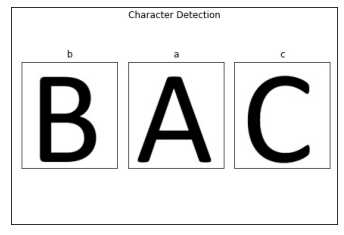

In [68]:
im = cv.imread('/content/drive/Colab_Notebooks/11december/letter/pic/conversion.jpg')
plt.xticks([]), plt.yticks([])
plt.imshow(im)